# Data Preparation: Resampling

Observations may be at a higher or lower frequency than our desired forecast frequency. For example, a business needs a daily forecast, but it has hourly or monthly observations

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

## Upsampling

This is the process of increasing the frequency of the samples, such as weekly to daily.  In the following example, we will interpolate data from monthly to daily. The Series Pandas object provides an interpolate() function with a nice selection of simple and more complex methods.

In [2]:
# example data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv"
parser = lambda x: pd.datetime.strptime("201"+x, "%Y-%m")
raw_df = pd.read_csv(url, parse_dates=["Month"], index_col=0, date_parser=parser)
raw_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Sales
Month,
2011-01-01,266.0
2011-02-01,145.9
2011-03-01,183.1
2011-04-01,119.3
2011-05-01,180.3


In [3]:
# linear interpolation method (monthly to daily)
upsampled = raw_df["Sales"].resample("D").mean()
interpolated = upsampled.interpolate(method="linear")
interpolated.head()

Month
2011-01-01    266.000000
2011-01-02    262.125806
2011-01-03    258.251613
2011-01-04    254.377419
2011-01-05    250.503226
Freq: D, Name: Sales, dtype: float64

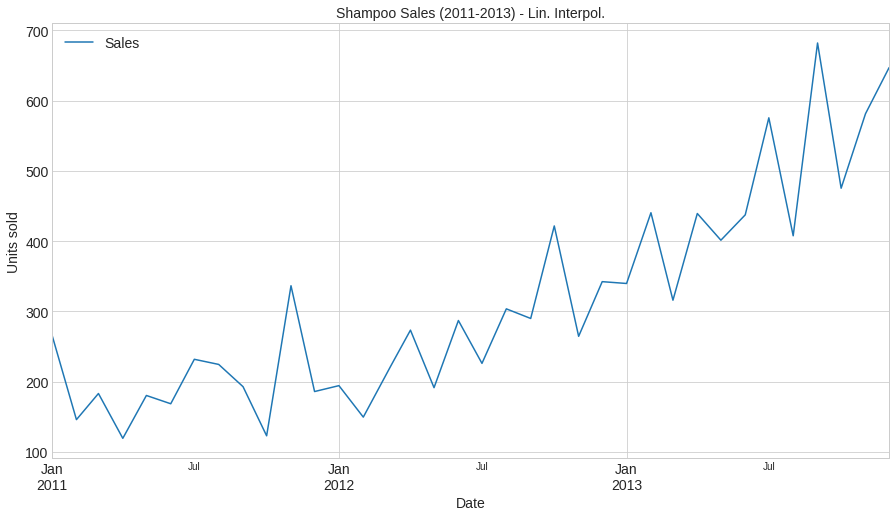

In [4]:
# plot linearly interpolated data
interpolated.plot(figsize=(15,8))
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Units sold", fontsize=14)
plt.title("Shampoo Sales (2011-2013) - Lin. Interpol.", fontsize=14)
plt.show()

In [5]:
# spline (polynomial) interpolation method (monthly to daily)
upsampled = raw_df["Sales"].resample("D").mean()
interpolated = upsampled.interpolate(method="spline", order=2)
interpolated.head()

Month
2011-01-01    266.000000
2011-01-02    258.630152
2011-01-03    251.560893
2011-01-04    244.720770
2011-01-05    238.109781
Freq: D, Name: Sales, dtype: float64

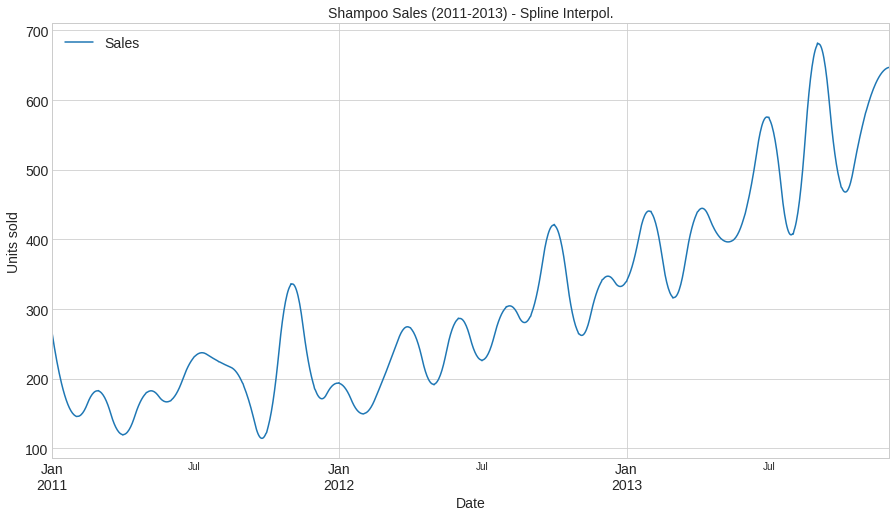

In [6]:
# plot spline (polynomial) interpolated data
interpolated.plot(figsize=(15,8))
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Units sold", fontsize=14)
plt.title("Shampoo Sales (2011-2013) - Spline Interpol.", fontsize=14)
plt.show()

## Downsampling

Decrease the frequency of the samples, such as daily to weekly. The sales data is monthly, but business needs quarterly forecasts.

In [7]:
# downsample shampoo sales quarterly
downsampled = raw_df["Sales"].resample("Q")
quarterly_mean_sales = downsampled.mean()
quarterly_mean_sales.head()

Month
2011-03-31    198.333333
2011-06-30    156.033333
2011-09-30    216.366667
2011-12-31    215.100000
2012-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64

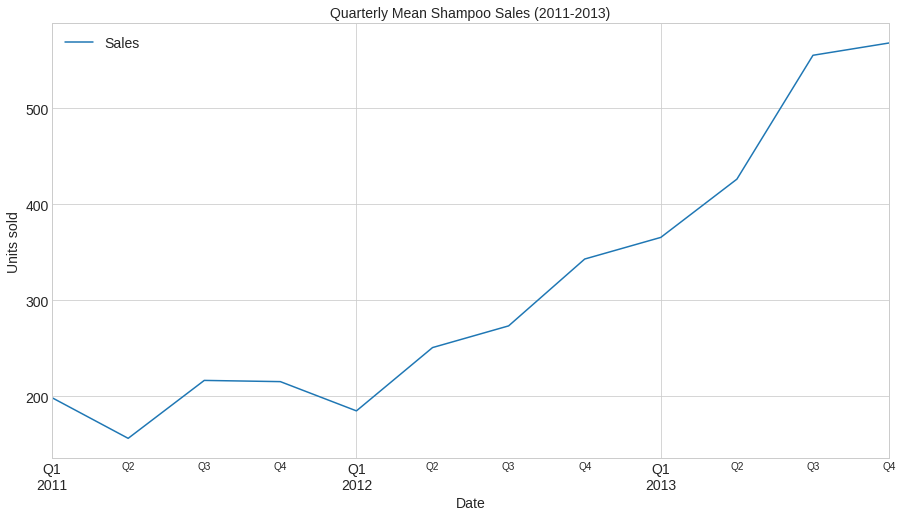

In [8]:
# plot quarterly downsampled data
quarterly_mean_sales.plot(figsize=(15,8))
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Units sold", fontsize=14)
plt.title("Quarterly Mean Shampoo Sales (2011-2013)", fontsize=14)
plt.show()

In [ ]:
pip install yfinance

In [10]:
# downsample stock prices monthly (i.e. show month ends close prices)
import yfinance as yf

tickers = ["MSFT"]
df = yf.download(tickers=tickers, start="2019-01-01", end="2020-01-01", interval="1d", group_by="ticker", auto_adjust=True)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,96.624980,98.760336,96.032903,98.148849,35329300
2019-01-03,97.158827,97.246186,94.344034,94.538162,42579100
2019-01-04,96.789994,99.498019,96.023206,98.935059,44060600
2019-01-07,98.653568,100.235672,98.012965,99.061226,35656100
2019-01-08,100.012457,100.915132,98.721533,99.779510,31514400


In [11]:
# downsample to month ends (M)
downsampled = df["Close"].resample("M")
month_close_prices = downsampled.apply(lambda x: x.iloc[-1]) 
month_close_prices.head()

Date
2019-01-31    101.361595
2019-02-28    109.202682
2019-03-31    114.963547
2019-04-30    127.304047
2019-05-31    121.004944
Freq: M, Name: Close, dtype: float64

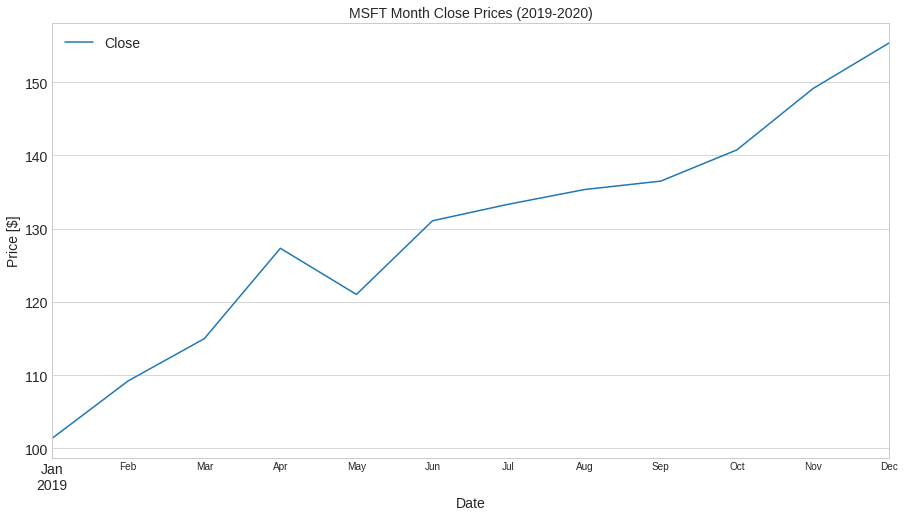

In [12]:
# plot month close prices
month_close_prices.plot(figsize=(15,8))
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price [$]", fontsize=14)
plt.title("MSFT Month Close Prices (2019-2020)", fontsize=14)
plt.show()